# Epidemic Modeller Project

This notebook goes through some example usages of the project.

## Basic Model

In [14]:
import matplotlib.pyplot as plt
import math as maths

# If running the code again, the code behind the scenes may have changed.
# This ensures it gets re-imported correctly to ensure it is using up-to-date code.
import importlib
if "model" in locals().keys():
    importlib.reload(basic_model)
    importlib.reload(basic_model_renderer)
else:
    from epidemicmodeller import basic_model, basic_model_renderer

# Create the model with some parameters and then run a simulation.
m = basic_model.BasicModel({"N": 400, "I": 1, "gamma": 1/6, "beta": 1/4, "b": 1})
output = m.run_model()

print(f"Model took {output.simulation_time:0.2f} seconds to run, it lasted {output.duration} days, "
      + f"and had a final size of {output.final_size}")


Model took 2.75 seconds to run, it lasted 107.1 days, and had a final size of 397


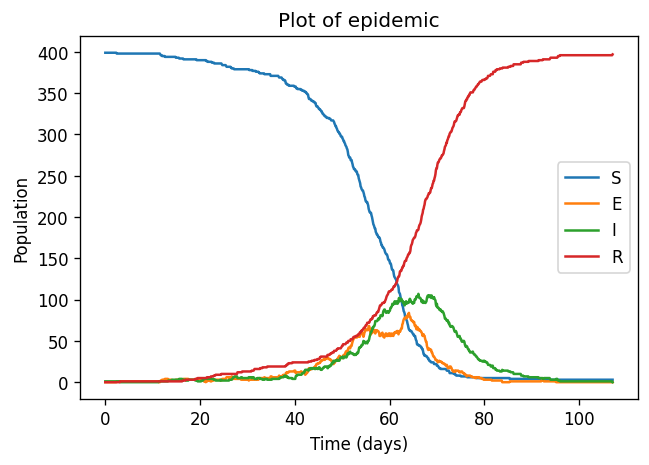

In [15]:
# Here we create a plot of each of the classes over the duration of the simulated epidemic.
fig, ax = plt.subplots(dpi=120)
ax.plot(output.classes["t"], output.classes["S"])
ax.plot(output.classes["t"], output.classes["E"])
ax.plot(output.classes["t"], output.classes["I"])
ax.plot(output.classes["t"], output.classes["R"])
ax.legend(["S", "E", "I", "R"])
ax.set(xlabel="Time (days)", ylabel="Population", title="Plot of epidemic")
plt.show()

In [16]:
# Then we render the simulated epidemic.
# This creates a new window with the visualisation.
basic_model_renderer.render_basic_model(output, screensize=800)





## Compartment Model

In [19]:
from epidemicmodeller import compartment_model, compartment_model_renderer

num_compartments = 4
c_output = compartment_model.CompartmentModel({"N": 300, "I_0": 1, "gamma": 1/6, "beta": 1/3, "b": 1, "compartments": num_compartments,
                           "timesteps_per_day": 10}).run_model()
print(f"Compartment Model took {c_output.simulation_time:0.2f} seconds to run, it lasted {c_output.duration} days, "
      + f"and had a final size of {c_output.final_size}")


Too many travellers!!!
Too many travellers!!!
Too many travellers!!!
Too many travellers!!!
Too many travellers!!!
Too many travellers!!!
Compartment Model took 2.72 seconds to run, it lasted 112.9 days, and had a final size of 279


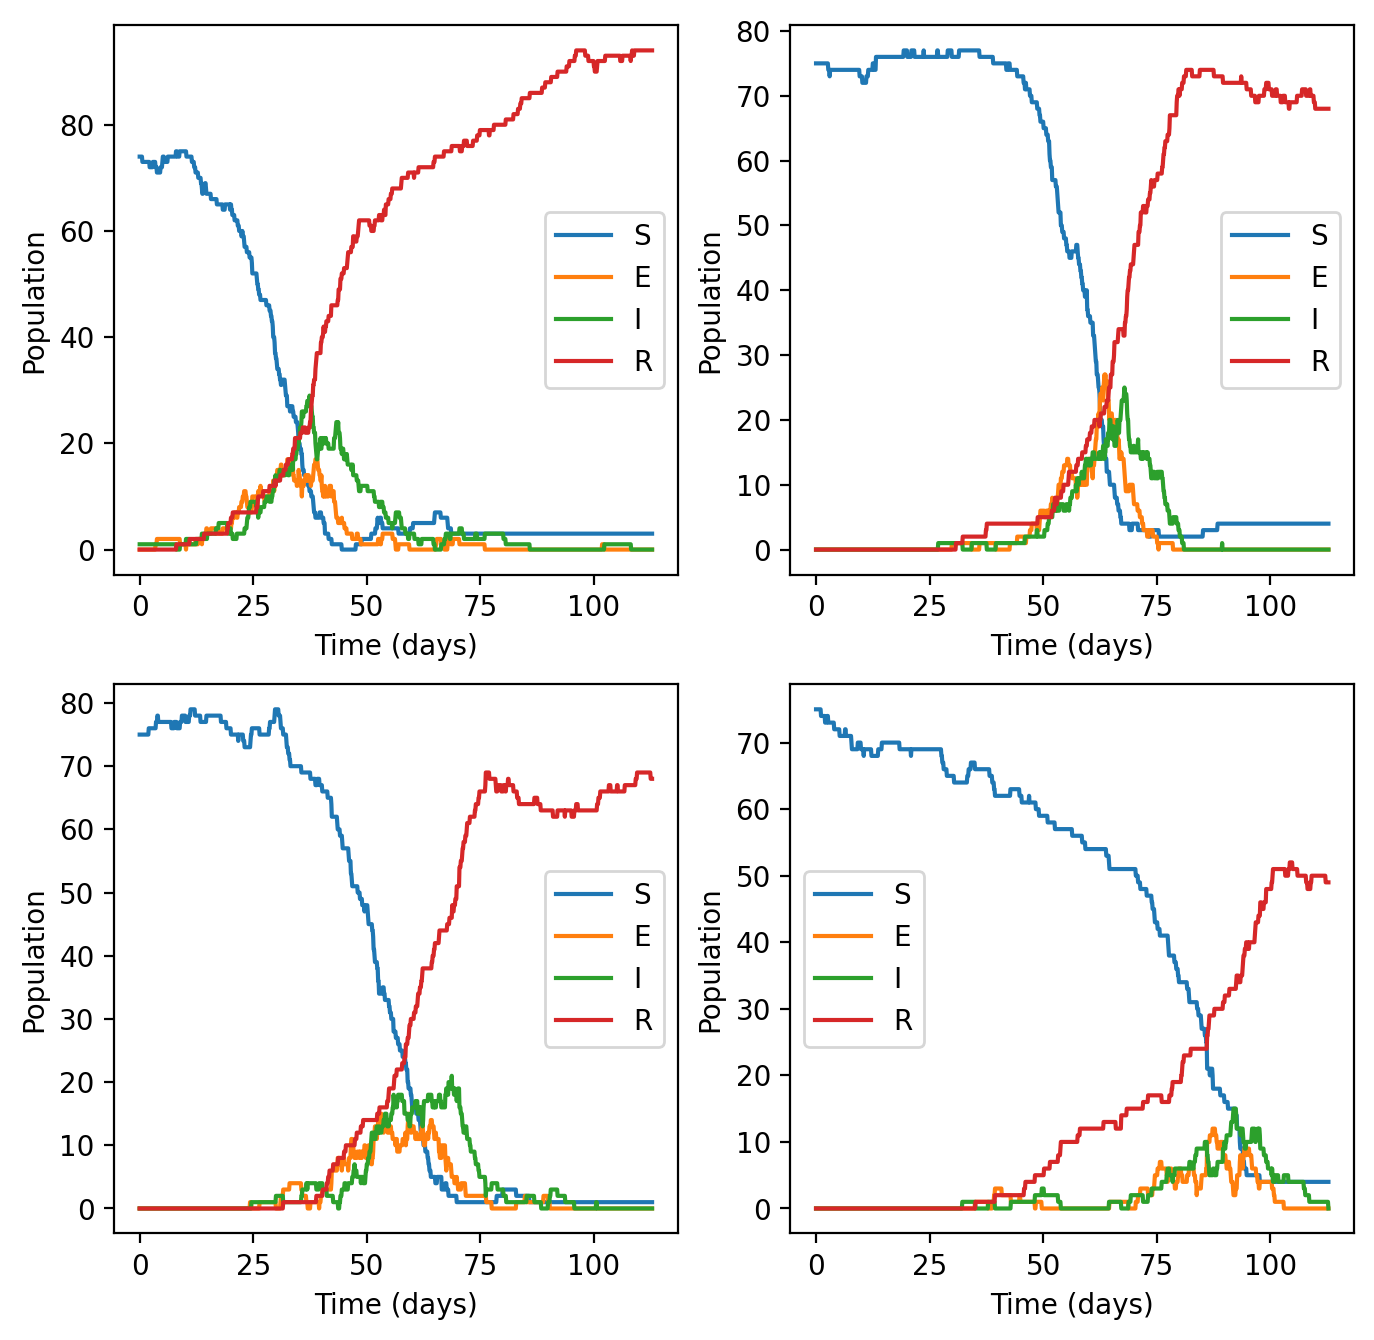

In [20]:
row_length = maths.ceil(maths.sqrt(num_compartments))
fig, ax = plt.subplots(row_length, row_length, figsize=(row_length*4, row_length*4), dpi=200)
for i in range(num_compartments):
    current_plot = ax[i//row_length][i%row_length]
    current_plot.plot(c_output.classes["t"], c_output.compartments[i].classes["S"])
    current_plot.plot(c_output.classes["t"], c_output.compartments[i].classes["E"])
    current_plot.plot(c_output.classes["t"], c_output.compartments[i].classes["I"])
    current_plot.plot(c_output.classes["t"], c_output.compartments[i].classes["R"])
    current_plot.legend(["S", "E", "I", "R"])
    current_plot.set(xlabel="Time (days)", ylabel="Population")
plt.show()

In [21]:
from epidemicmodeller import compartment_model_renderer
compartment_model_renderer.render_compartment_model(c_output, screensize=800, days_per_second=3)